In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'online-payments-fraud-detection-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2093649%2F3478314%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240403%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240403T163301Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dade667704f487cc7d821bc50398879dd2981fb5671fc95c11f0a7ae6107faa7553075d36befb235024c5dd6ae514512c5235d1274235984fb3876e6701ece411241b7cd8682a919d3a314283671a80585075d8776a1fdc71be6e4dbce59e8e926501ea9ec98c3fa0fa4573dfae102c11bb765a010ed95b98ca5988077ef3f65cd31b35840ef361f2eeed59dbd44d392ec31e51455333b7803cc5da2e1834f13fc72e26cc09a4eb37faac905786c9803bb55812d0a35079f5d1ce2adc22e9d536c194405fd5c0a10742b702bec0f169720aa19acb5205863e83e771955ca99308b2777941141767c2f8d1ec0e6872fb4723a4590029fb3c453249cae2e43d4ab6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 186385561 bytes downloaded
Downloaded and uncompressed: online-payments-fraud-detection-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [3]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loading the dataset into pandas dataframe
df = pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
# Retain the 6 features and the target variable
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [7]:
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others
X = df.drop('isFraud',axis=1)


#Load the target variable to y
y = df['isFraud']

In [10]:
# Do the train/test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [11]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [12]:
# Prediction with the test set
y_predict = classifier.predict(X_test)

In [13]:
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
6322570,0,0
3621196,0,0
1226256,0,0
2803274,0,0
3201247,0,0
3681019,0,0
1351584,0,0
5422829,0,0
5870912,0,0
2400263,0,0


In [14]:
# Compute Model Accuracy.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9992524044078278


In [15]:
# Model accuracy on training set.

# Get the predictions from the model for the training set.

y_train_pred = classifier.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.9992803952729267


In [16]:
# Getting probability predictions from the model.
y_test_proba = classifier.predict_proba(X_test)

print(y_test_proba.shape)

(1908786, 2)


In [17]:
y_test_proba[0:5,:]

array([[9.90914469e-01, 9.08553137e-03],
       [5.78209055e-01, 4.21790945e-01],
       [6.83086498e-01, 3.16913502e-01],
       [9.99999508e-01, 4.91585075e-07],
       [9.99693434e-01, 3.06566184e-04]])

In [18]:
import numpy as np

# Given array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)


[['0.9909144686259501' '0.0090855313740498']
 ['0.5782090546663730' '0.4217909453336271']
 ['0.6830864978197835' '0.3169135021802165']
 ['0.9999995084149252' '0.0000004915850747']
 ['0.9996934338164003' '0.0003065661835997']]


In [ ]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)


In [20]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

Results.head(5)

,Actual,Predictions,Prob(Class = 1)
6322570,0,0,0.0090855313740498
3621196,0,0,0.4217909453336271
1226256,0,0,0.3169135021802165
2803274,0,0,0.0000004915850747
3201247,0,0,0.0003065661835997


In [21]:
#Generate the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1905716     602]
 [    825    1643]]


Text(95.72222222222221, 0.5, 'True Label')

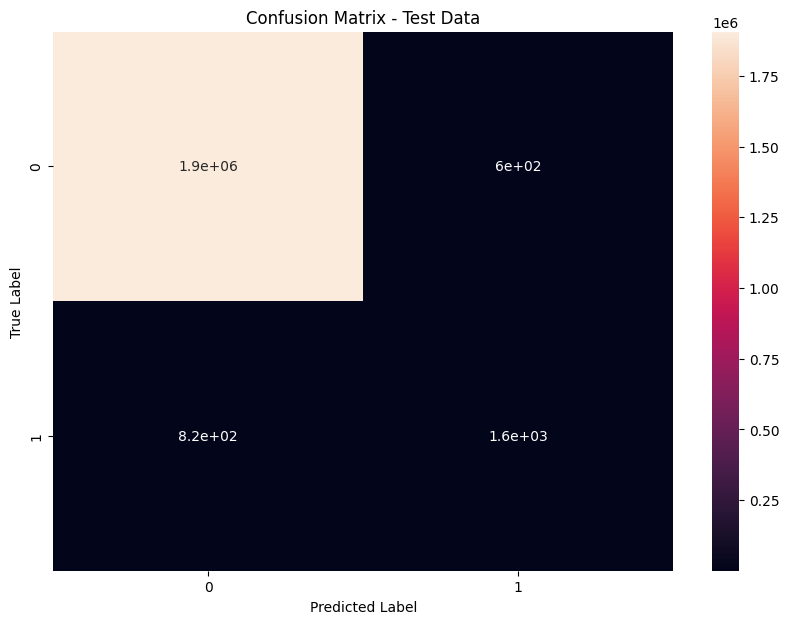

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

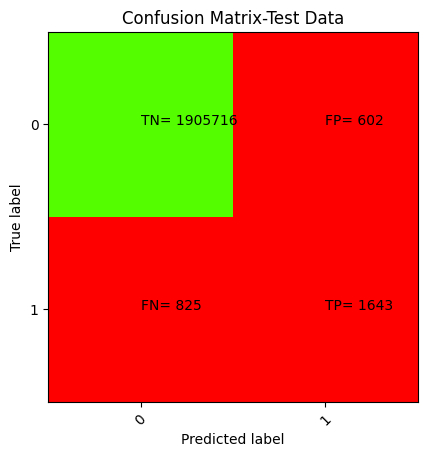

In [23]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [24]:
#Calculate common error metrics for a 2-class classifier

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.73      0.67      0.70      2468

    accuracy                           1.00   1908786
   macro avg       0.87      0.83      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [25]:
# Calculate metrics values individually

# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [26]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.6657212317666127


In [27]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.7318485523385301


In [28]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9996842079862857


In [29]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.9992524044078278
